In [1]:
import pandas as pd


# Load raw data
data = pd.read_csv(r"C:\Users\kingsta\Desktop\week_two(2)\10_ACADAMY_KAIM_W2\data\cleaned_data2.csv")
print(data.head())




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kingsta\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\kingsta\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\kingsta\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kingsta\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\kingsta\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\kingsta\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



      Bearer Id                Start  Start ms                  End  End ms  \
0  1.311448e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   662.0   
1  1.311448e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   606.0   
2  1.311448e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   652.0   
3  1.311448e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   171.0   
4  1.311448e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   954.0   

   Dur. (ms)       IMSI  MSISDN/Number       IMEI     Last Location Name  ...  \
0  14.416352  32.969527      24.239723  31.201151  9.16456699548519E+015  ...   
1  14.126742  32.969529      24.240225  31.208802                L77566A  ...   
2  14.124291  32.969522      24.242561  31.194380                D42335A  ...   
3  14.094286  32.969527      24.242256  31.196506                T21824A  ...   
4  13.900780  32.969527      24.240758  31.197931                D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Byt

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 49 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

HERE IS THE CHALLENGES BEGINS WITH THEIR SOLUTIONS

In [7]:
engagement_metrics = data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Session frequency
    'Dur. (ms)': 'sum',  # Session duration
    'Total DL (Bytes)': 'sum',  # Total download traffic
    'Total UL (Bytes)': 'sum'  # Total upload traffic
}).reset_index()


In [10]:
top_10_frequency = engagement_metrics.sort_values('Bearer Id', ascending=False).head(10)
top_10_duration = engagement_metrics.sort_values('Dur. (ms)', ascending=False).head(10)
engagement_metrics['Total Traffic (Bytes)'] = engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']
top_10_traffic = engagement_metrics.sort_values('Total Traffic (Bytes)', ascending=False).head(10)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
engagement_metrics[['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']] = scaler.fit_transform(
    engagement_metrics[['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']]
)


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
engagement_metrics['Cluster'] = kmeans.fit_predict(engagement_metrics[['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']])


In [13]:
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()


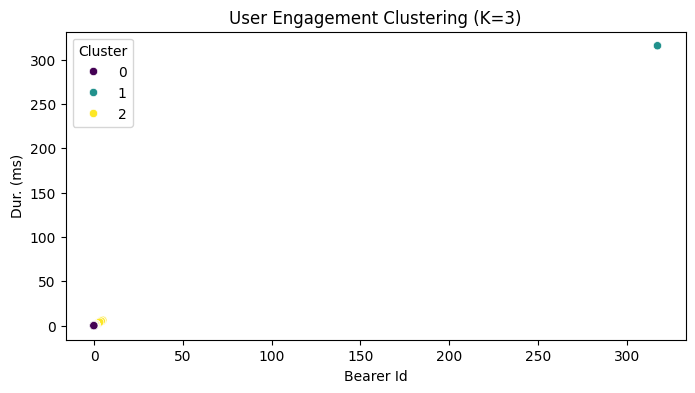

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Bearer Id', y='Dur. (ms)', hue='Cluster', data=engagement_metrics, palette='viridis')
plt.title('User Engagement Clustering (K=3)')
plt.show()


In [3]:
import pandas as pd

# Aggregate metrics per customer
engagement_metrics = data.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum')
).reset_index()

# Compute total traffic after aggregation
engagement_metrics['total_traffic'] = engagement_metrics['total_download'] + engagement_metrics['total_upload']

# Top 10 customers for each metric
top_10_frequency = engagement_metrics.nlargest(10, 'session_frequency')
top_10_duration = engagement_metrics.nlargest(10, 'total_duration')
top_10_traffic = engagement_metrics.nlargest(10, 'total_traffic')

# Display results
print("Top 10 Customers by Session Frequency:")
print(top_10_frequency)

print("\nTop 10 Customers by Total Session Duration:")
print(top_10_duration)

print("\nTop 10 Customers by Total Session Traffic:")
print(top_10_traffic)


Top 10 Customers by Session Frequency:
       MSISDN/Number  session_frequency  total_duration  total_download  \
53644      24.239686               1067    11474.816822    4.875453e+11   
13526      24.238575                 18      231.977486    7.301517e+09   
6437       24.238235                 17      222.446566    8.156743e+09   
13180      24.238559                 17      233.413152    7.770043e+09   
37052      24.239568                 16      198.016097    7.081602e+09   
76363      24.240048                 15      188.665170    7.309542e+09   
92923      24.242558                 15      195.767943    7.811295e+09   
65118      24.239789                 13      172.629670    5.052068e+09   
666        24.237885                 12      156.933857    4.540607e+09   
1279       24.237926                 12      154.378870    5.096079e+09   

       total_upload  total_traffic  
53644  4.441826e+10   5.319636e+11  
13526  6.696507e+08   7.971167e+09  
6437   6.894830e+08   8.

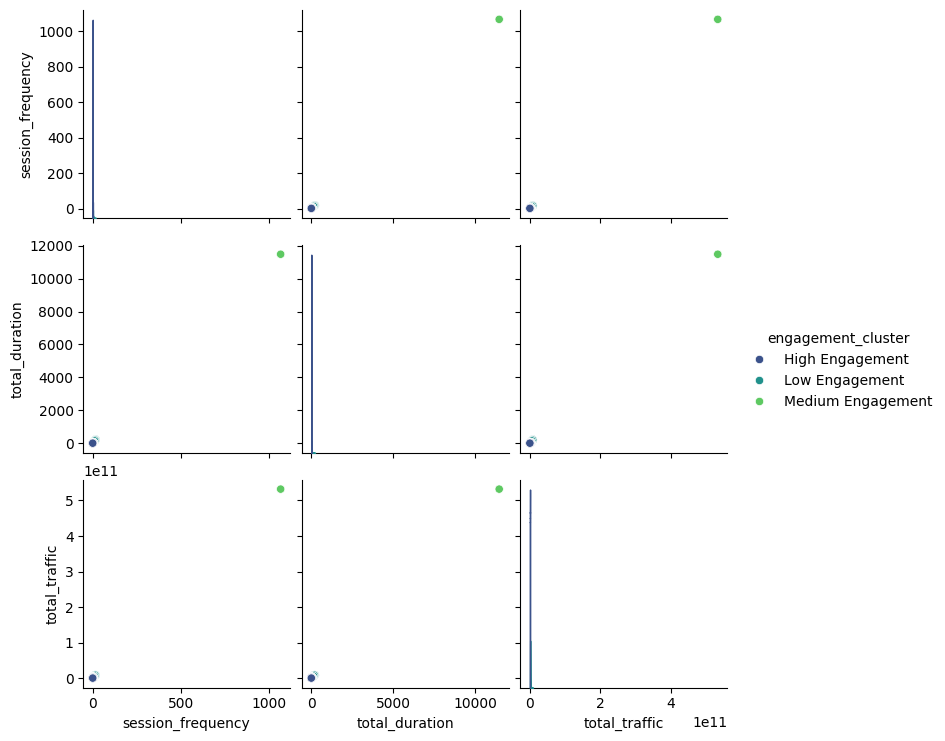

        MSISDN/Number  session_frequency  total_duration  total_download  \
0           24.237822                  1       11.667542    8.426375e+08   
1           24.237822                  1       12.107528    1.207552e+08   
2           24.237822                  1       11.812808    5.566597e+08   
3           24.237822                  1       10.817355    4.019932e+08   
4           24.237822                  2       19.656774    1.363130e+09   
...               ...                ...             ...             ...   
106851      24.243431                  1        9.083756    6.879252e+08   
106852      24.243431                  1       11.856437    4.445751e+08   
106853      28.793241                  1       13.684702    1.948281e+08   
106854      33.451104                  1       12.441267    5.396350e+08   
106855      34.413663                  1       13.676070    7.869760e+07   

        total_upload  total_traffic engagement_cluster  
0         36053108.0   8.78690

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns for clustering
features = engagement_metrics[['session_frequency', 'total_duration', 'total_traffic']]

# Normalize the features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['engagement_cluster'] = kmeans.fit_predict(normalized_features)

# Add cluster labels for interpretation
engagement_metrics['engagement_cluster'] = engagement_metrics['engagement_cluster'].map({
    0: 'Low Engagement',
    1: 'Medium Engagement',
    2: 'High Engagement'
})

# Visualize the clusters (optional)
sns.pairplot(engagement_metrics, vars=['session_frequency', 'total_duration', 'total_traffic'], 
             hue='engagement_cluster', palette='viridis')
plt.show()

# View the data with cluster labels
print(engagement_metrics)


  engagement_cluster  min_session_frequency  max_session_frequency  \
0    High Engagement                      1                      2   
1     Low Engagement                      2                     18   
2  Medium Engagement                   1067                   1067   

   avg_session_frequency  total_session_frequency  min_total_duration  \
0               1.073904                    90136            8.873888   
1               2.565134                    58798           18.235985   
2            1067.000000                     1067        11474.816822   

   max_total_duration  avg_total_duration  total_total_duration  \
0           26.294340           12.104025          1.015927e+06   
1          233.413152           29.227385          6.699501e+05   
2        11474.816822        11474.816822          1.147482e+04   

   min_total_traffic  max_total_traffic  avg_total_traffic  \
0       3.324901e+07       9.507607e+08       5.027225e+08   
1       2.842182e+08       8.8462

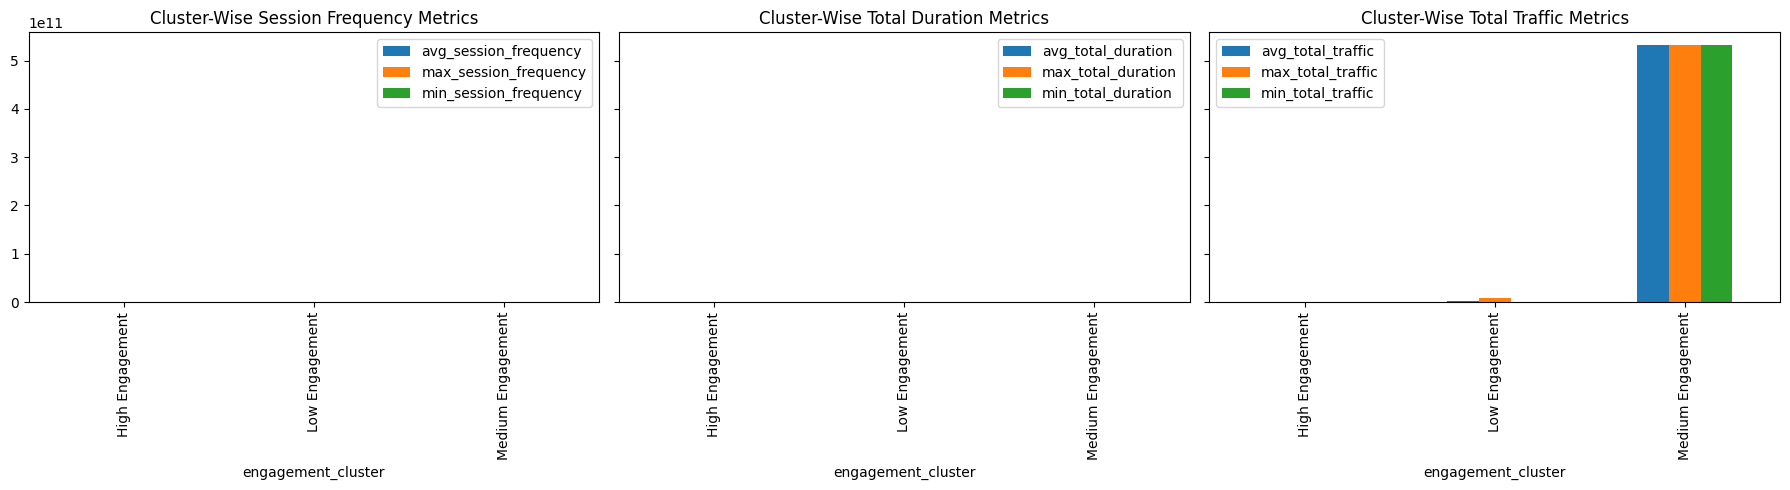

In [5]:
# Group by cluster and compute summary statistics
cluster_summary = engagement_metrics.groupby('engagement_cluster').agg(
    min_session_frequency=('session_frequency', 'min'),
    max_session_frequency=('session_frequency', 'max'),
    avg_session_frequency=('session_frequency', 'mean'),
    total_session_frequency=('session_frequency', 'sum'),
    min_total_duration=('total_duration', 'min'),
    max_total_duration=('total_duration', 'max'),
    avg_total_duration=('total_duration', 'mean'),
    total_total_duration=('total_duration', 'sum'),
    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
).reset_index()

# Display summary statistics
print(cluster_summary)

# Visualization for averages
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
metrics = ['session_frequency', 'total_duration', 'total_traffic']
titles = ['Session Frequency', 'Total Duration', 'Total Traffic']

for i, metric in enumerate(metrics):
    cluster_summary.plot.bar(
        x='engagement_cluster',
        y=[f'avg_{metric}', f'max_{metric}', f'min_{metric}'],
        ax=axes[i],
        title=f'Cluster-Wise {titles[i]} Metrics'
    )

plt.tight_layout()
plt.show()


In [8]:
# Check column names to ensure correct usage
print(data.columns)

# Rename columns if necessary
data.rename(columns={
    'actual_download_column_name': 'total_download',  # Replace with actual name
    'actual_upload_column_name': 'total_upload'       # Replace with actual name
}, inplace=True)

# Ensure 'total_download' and 'total_upload' exist before computing 'total_traffic'
if 'total_download' in data.columns and 'total_upload' in data.columns:
    # Aggregate total traffic (download + upload) per user and application
    data['total_traffic'] = data['total_download'] + data['total_upload']
    user_app_traffic = data.groupby(['application', 'MSISDN/Number']).agg(
        total_traffic=('total_traffic', 'sum')
    ).reset_index()

    # Rank users within each application by total traffic
    user_app_traffic['rank'] = user_app_traffic.groupby('application')['total_traffic'].rank(
        method='dense', ascending=False
    )

    # Filter top 10 users per application
    top_users_per_app = user_app_traffic[user_app_traffic['rank'] <= 10]

    # Sort results for better readability
    top_users_per_app = top_users_per_app.sort_values(by=['application', 'rank'])

    # Display the result
    print(top_users_per_app)
else:
    print("Columns 'total_download' or 'total_upload' are missing in the dataset.")


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)', 'HTTP DL (Bytes)',
       'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)'

In [9]:
# List of application types and their corresponding download/upload columns
application_traffic = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}

# Reshape data to create an 'application' column
application_data = []
for app, columns in application_traffic.items():
    temp = data[['MSISDN/Number']].copy()
    temp['application'] = app
    temp['total_download'] = data[columns[0]]
    temp['total_upload'] = data[columns[1]]
    temp['total_traffic'] = temp['total_download'] + temp['total_upload']
    application_data.append(temp)

# Combine all application data
application_data = pd.concat(application_data, ignore_index=True)

# Aggregate total traffic per user and application
user_app_traffic = application_data.groupby(['application', 'MSISDN/Number']).agg(
    total_traffic=('total_traffic', 'sum')
).reset_index()

# Rank users within each application by total traffic
user_app_traffic['rank'] = user_app_traffic.groupby('application')['total_traffic'].rank(
    method='dense', ascending=False
)

# Filter top 10 users per application
top_users_per_app = user_app_traffic[user_app_traffic['rank'] <= 10]

# Sort results for better readability
top_users_per_app = top_users_per_app.sort_values(by=['application', 'rank'])

# Display the result
print(top_users_per_app)


         application  MSISDN/Number  total_traffic  rank
53644         Gaming      24.239686   4.616346e+11   1.0
6437          Gaming      24.238235   7.749432e+09   2.0
92923         Gaming      24.242558   7.461045e+09   3.0
13180         Gaming      24.238559   7.326673e+09   4.0
76363         Gaming      24.240048   6.970568e+09   5.0
13526         Gaming      24.238575   6.887572e+09   6.0
37052         Gaming      24.239568   6.725559e+09   7.0
63028         Gaming      24.239768   6.646303e+09   8.0
92577         Gaming      24.242555   6.268620e+09   9.0
57241         Gaming      24.239716   6.103856e+09  10.0
160500        Google      24.239686   8.250702e+09   1.0
120382        Google      24.238575   1.521919e+08   2.0
120036        Google      24.238559   1.423079e+08   3.0
113293        Google      24.238235   1.279738e+08   4.0
199779        Google      24.242558   1.232231e+08   5.0
143908        Google      24.239568   1.165163e+08   6.0
212993        Google      24.24

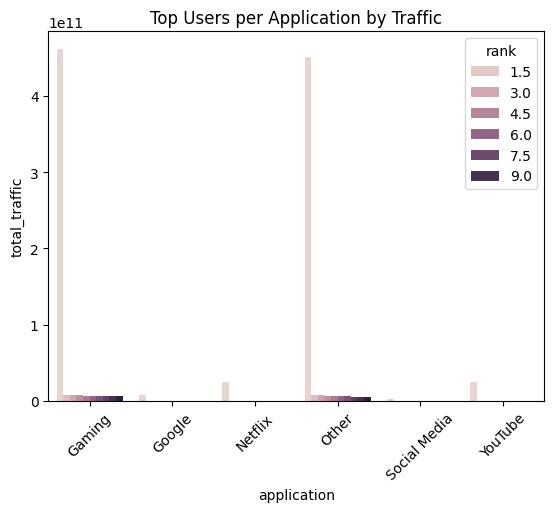

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=top_users_per_app, x='application', y='total_traffic', hue='rank')
plt.title('Top Users per Application by Traffic')
plt.xticks(rotation=45)
plt.show()


In [11]:
cumulative_traffic = user_app_traffic.groupby('application')['total_traffic'].sum().sort_values(ascending=False)
print(cumulative_traffic)


application
Gaming          6.455040e+13
Other           6.440523e+13
YouTube         3.396545e+12
Netflix         3.394314e+12
Google          1.171102e+12
Social Media    2.742394e+11
Name: total_traffic, dtype: float64


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Ensure your dataset is loaded into the variable `data`
# Adjust columns as per your dataset
engagement_data = data.groupby('MSISDN/Number').agg(
    session_frequency=('MSISDN/Number', 'size'),  # Count the number of sessions
    total_session_duration=('Dur. (ms)', 'sum'),  # Total session duration in ms
    total_traffic=('Total UL (Bytes)', lambda x: (x + data.loc[x.index, 'Total DL (Bytes)']).sum())  # Sum of Total UL and DL Bytes
).reset_index()

# Step 2: Standardize the Data
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement_data[['session_frequency', 'total_session_duration', 'total_traffic']])

# Step 3: Find the Optimal Number of Clusters (Elbow Method)
inertia = []
silhouette_scores = []

k_values = range(1, 11)  # Reduced range for testing efficiency
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        try:
            silhouette_scores.append(silhouette_score(engagement_scaled, kmeans.labels_, n_jobs=-1))
        except Exception as e:
            print(f"Error calculating silhouette score for k={k}: {e}")
            silhouette_scores.append(None)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Optionally, plot silhouette scores for comparison
if silhouette_scores:
    plt.figure(figsize=(10, 6))
    plt.plot(k_values[1:], silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Scores for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

# Step 4: Cluster Users with Optimal k
optimal_k = 4  # Replace with your elbow-determined k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
engagement_data['cluster'] = kmeans.fit_predict(engagement_scaled)

# Step 5: Interpret Results
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['session_frequency', 'total_session_duration', 'total_traffic']
)
print("Cluster Centers (De-normalized):")
print(cluster_centers)

# Analyze cluster composition
cluster_summary = engagement_data.groupby('cluster').agg(
    user_count=('MSISDN/Number', 'count'),
    avg_frequency=('session_frequency', 'mean'),
    avg_session_duration=('total_session_duration', 'mean'),
    avg_total_traffic=('total_traffic', 'mean')
).reset_index()

print("Cluster Summary:")
print(cluster_summary)


KeyboardInterrupt: 

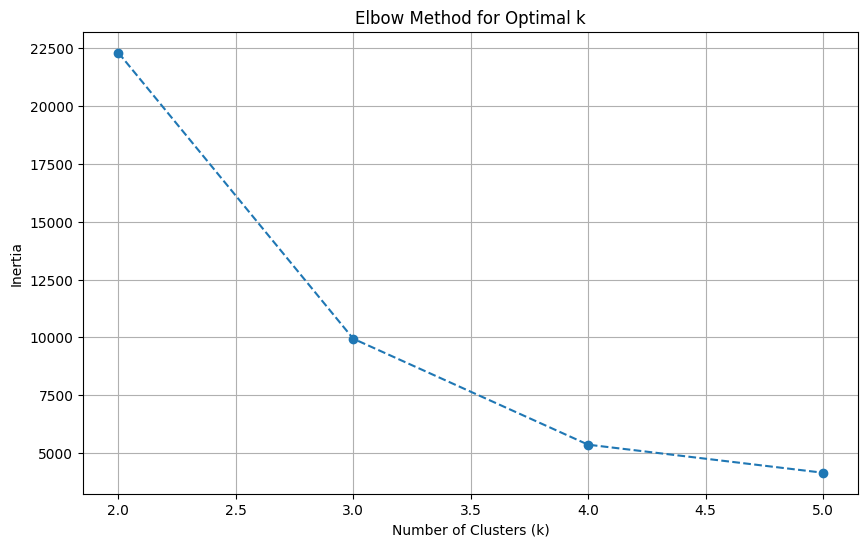

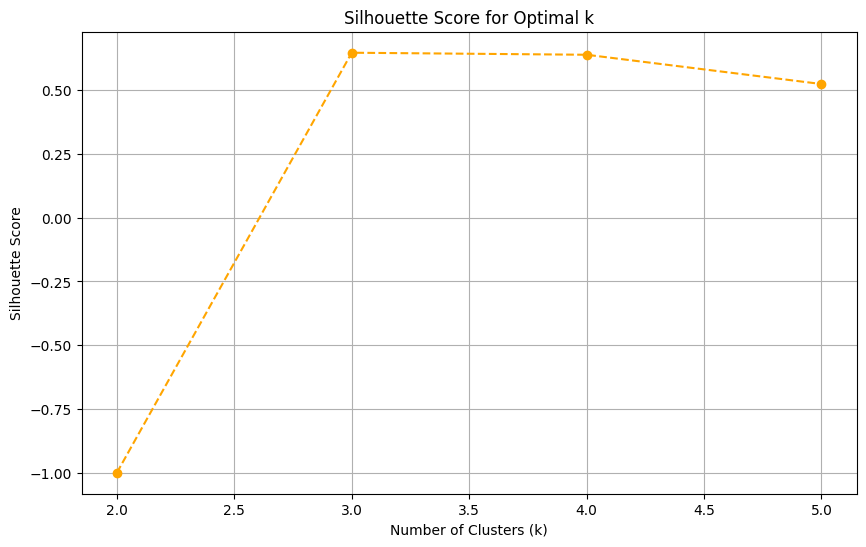

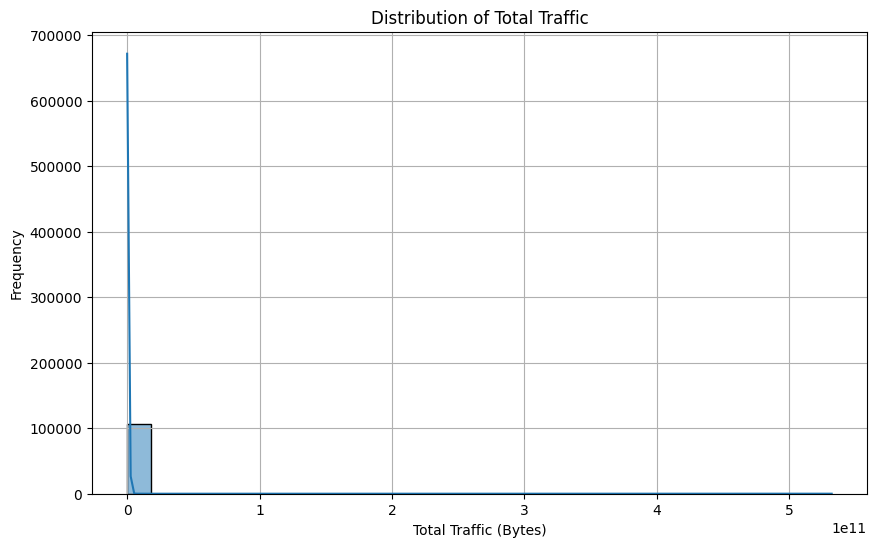

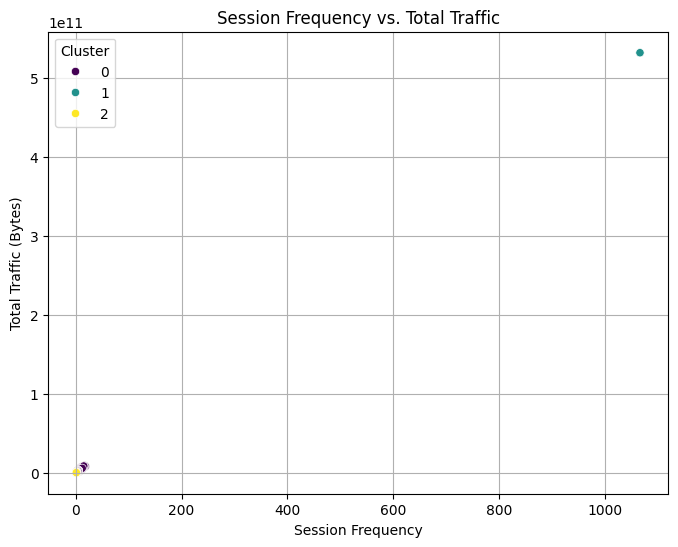

Cluster Summary:
   cluster  user_count  avg_frequency  avg_session_duration  avg_total_traffic
0        0       22661       2.571643             29.308146       1.386963e+09
1        1           1    1067.000000          11474.816822       5.319636e+11
2        2       84194       1.076775             12.135371       5.036377e+08
Cluster Centers (De-normalized):
   session_frequency  total_session_duration  total_traffic  cluster
0           2.570736               29.296768   1.386043e+09        0
1        1067.000000            11474.816822   5.319636e+11        1
2           1.076380               12.131093   5.035078e+08        2


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Step 2: Aggregate Data for User Engagement Analysis
engagement_data = data.groupby('MSISDN/Number').agg(
    session_frequency=('MSISDN/Number', 'size'),  # Count the number of sessions
    total_session_duration=('Dur. (ms)', 'sum'),  # Total session duration
    total_traffic=('Total UL (Bytes)', lambda x: (x + data.loc[x.index, 'Total DL (Bytes)']).sum())  # UL + DL
).reset_index()

# Step 3: Standardize the Data
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(
    engagement_data[['session_frequency', 'total_session_duration', 'total_traffic']]
)

# Step 4: Determine Optimal Number of Clusters (Optimized)
inertia = []
silhouette_scores = []

# Reduce the number of k-values to test
k_values = range(2, 6)  # Limit to 2 to 5 clusters to speed up computation

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Use n_init instead of n_jobs
    kmeans.fit(engagement_scaled)
    inertia.append(kmeans.inertia_)
    
    # Sample the data to compute silhouette score efficiently
    sample_size = min(engagement_scaled.shape[0], 1000)  # Sample at most 1000 points
    sample_indices = np.random.choice(engagement_scaled.shape[0], sample_size, replace=False)
    
    # Ensure there are at least two clusters in the sample before calculating silhouette score
    unique_labels = np.unique(kmeans.labels_[sample_indices])
    if len(unique_labels) > 1:  # Check if there are multiple clusters in the sample
        silhouette_scores.append(silhouette_score(engagement_scaled[sample_indices], kmeans.labels_[sample_indices]))
    else:
        silhouette_scores.append(-1)  # Assign a default silhouette score if only one cluster is found

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Step 5: Cluster Users with Optimal k
optimal_k = 3  # Use the best k from the elbow/silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
engagement_data['cluster'] = kmeans.fit_predict(engagement_scaled)

# Step 6: Visualizations
# Univariate Analysis: Distribution of Total Traffic
plt.figure(figsize=(10, 6))
sns.histplot(engagement_data['total_traffic'], kde=True, bins=30)
plt.title('Distribution of Total Traffic')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Bivariate Analysis: Scatter Plot for Frequency vs. Traffic
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=engagement_data['session_frequency'],
    y=engagement_data['total_traffic'],
    hue=engagement_data['cluster'],  # Color by cluster
    palette='viridis'
)
plt.title('Session Frequency vs. Total Traffic')
plt.xlabel('Session Frequency')
plt.ylabel('Total Traffic (Bytes)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Cluster Summary
cluster_summary = engagement_data.groupby('cluster').agg(
    user_count=('MSISDN/Number', 'count'),
    avg_frequency=('session_frequency', 'mean'),
    avg_session_duration=('total_session_duration', 'mean'),
    avg_total_traffic=('total_traffic', 'mean')
).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Step 7: De-Normalized Cluster Centers for Interpretation
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['session_frequency', 'total_session_duration', 'total_traffic']
)
cluster_centers['cluster'] = range(optimal_k)
print("Cluster Centers (De-normalized):")
print(cluster_centers)


In [24]:
from tabulate import tabulate  # For better table formatting

# Generate and print Cluster Summary Table
cluster_summary = engagement_data.groupby('cluster').agg(
    user_count=('MSISDN/Number', 'count'),
    avg_frequency=('session_frequency', 'mean'),
    avg_session_duration=('total_session_duration', 'mean'),
    avg_total_traffic=('total_traffic', 'mean')
).reset_index()

print("Cluster Summary:")
print(tabulate(cluster_summary, headers='keys', tablefmt='grid'))

# Generate and print De-normalized Cluster Centers Table
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['session_frequency', 'total_session_duration', 'total_traffic']
)
cluster_centers['cluster'] = range(optimal_k)

print("\nCluster Centers (De-normalized):")
print(tabulate(cluster_centers, headers='keys', tablefmt='grid'))


Cluster Summary:
+----+-----------+--------------+-----------------+------------------------+---------------------+
|    |   cluster |   user_count |   avg_frequency |   avg_session_duration |   avg_total_traffic |
+====+===========+==============+=================+========================+=====================+
|  0 |         0 |        22661 |         2.57164 |                29.3081 |         1.38696e+09 |
+----+-----------+--------------+-----------------+------------------------+---------------------+
|  1 |         1 |            1 |      1067       |             11474.8    |         5.31964e+11 |
+----+-----------+--------------+-----------------+------------------------+---------------------+
|  2 |         2 |        84194 |         1.07678 |                12.1354 |         5.03638e+08 |
+----+-----------+--------------+-----------------+------------------------+---------------------+

Cluster Centers (De-normalized):
+----+---------------------+--------------------------+---